# Introduction

Recommendation systems form the core of marketing techniques used by large companies like Netflix, Amazon, and Youtube. 

Recommender systems are the systems that are designed to recommend things to the user based on many different factors. These systems predict the most likely product that the users are most likely to purchase and are of interest to.


*  Recommendation systems are a subclass of machine learning.
*  It is a system which predicts ratings a user might give to a specific item. These predictions will then be ranked and returned back to the user as a recommendation.



# Terminology

Before we dive in, there are a few terms that you should know:

**Items**: The entities a system recommends. Ex. for the Google Play store, the items are apps to install. For YouTube, the items are videos.

**Query**: The information a system uses to make recommendations. 

* user information
  *   the id of the user
  *   items that users previously interacted with

**Embedding**



*   A mapping from a discrete set (in this case, the set of queries, or the set of items to recommend) to a vector space called the embedding space. (basically describing things like movies, books..etc as a bunch of numbers in order to better understand them!)
*   Many recommendation systems rely on learning an appropriate embedding representation of the queries and items.


 

# Content-based Recommenders
 

1) Content-based filtering uses **item features** to recommend other items similar to what the user likes, based on their previous actions or explicit feedback.

Consider the example of an App Store. The following figure shows a feature matrix where each row represents an app and each column represents a feature. Features could include categories (such as Education, Casual, Health), the publisher of the app, and many others.

 To simplify, assume this feature matrix is binary: a non-zero value means the app has that feature.

2) You can also represent the user in the same feature space. 

**How do you determine the features of the user?**

Some features can be implicit, based on the apps they have previously installed. For example, the user has installed another app in the past published by Science R Us.

And some of the user-related features could be explicitly provided by the user. For example, a user has selected "Entertainment" Apps in the recommendation section of their profile. 


3) Finally, The model should recommend items relevant to this user. To do so, you must first pick a **similarity metric** (for example, dot product). Then, you must set up the system to score each candidate item according to this similarity metric. Note that the recommendations are specific to this user, as the model did not use any information about other users.

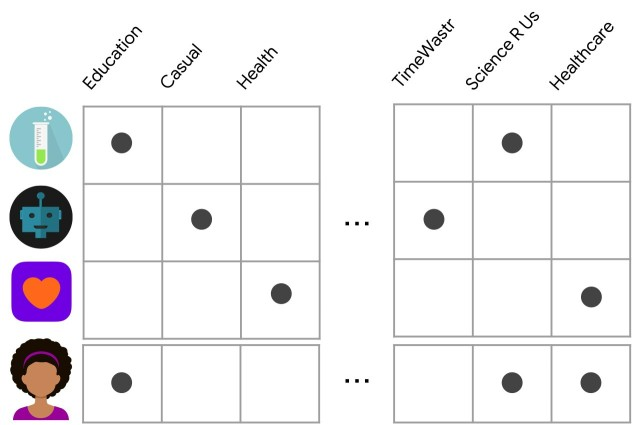

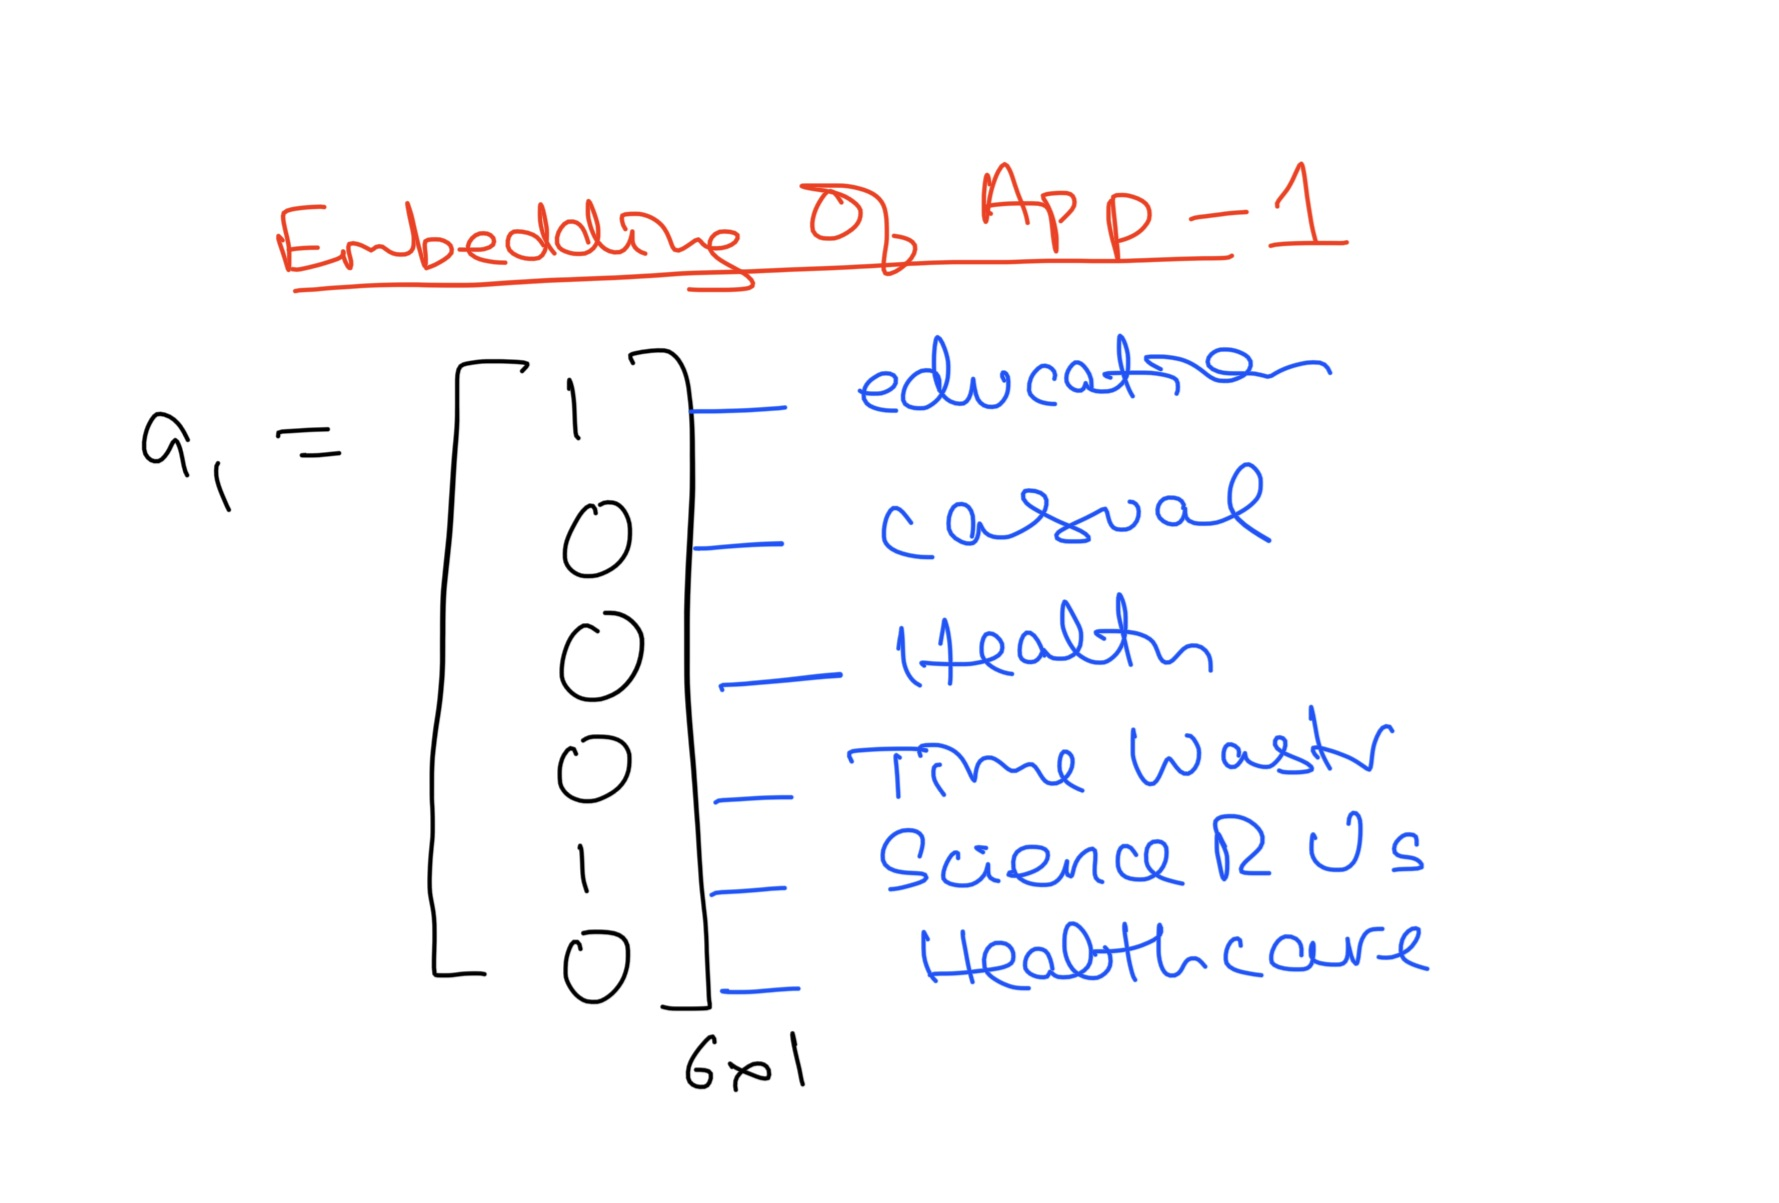

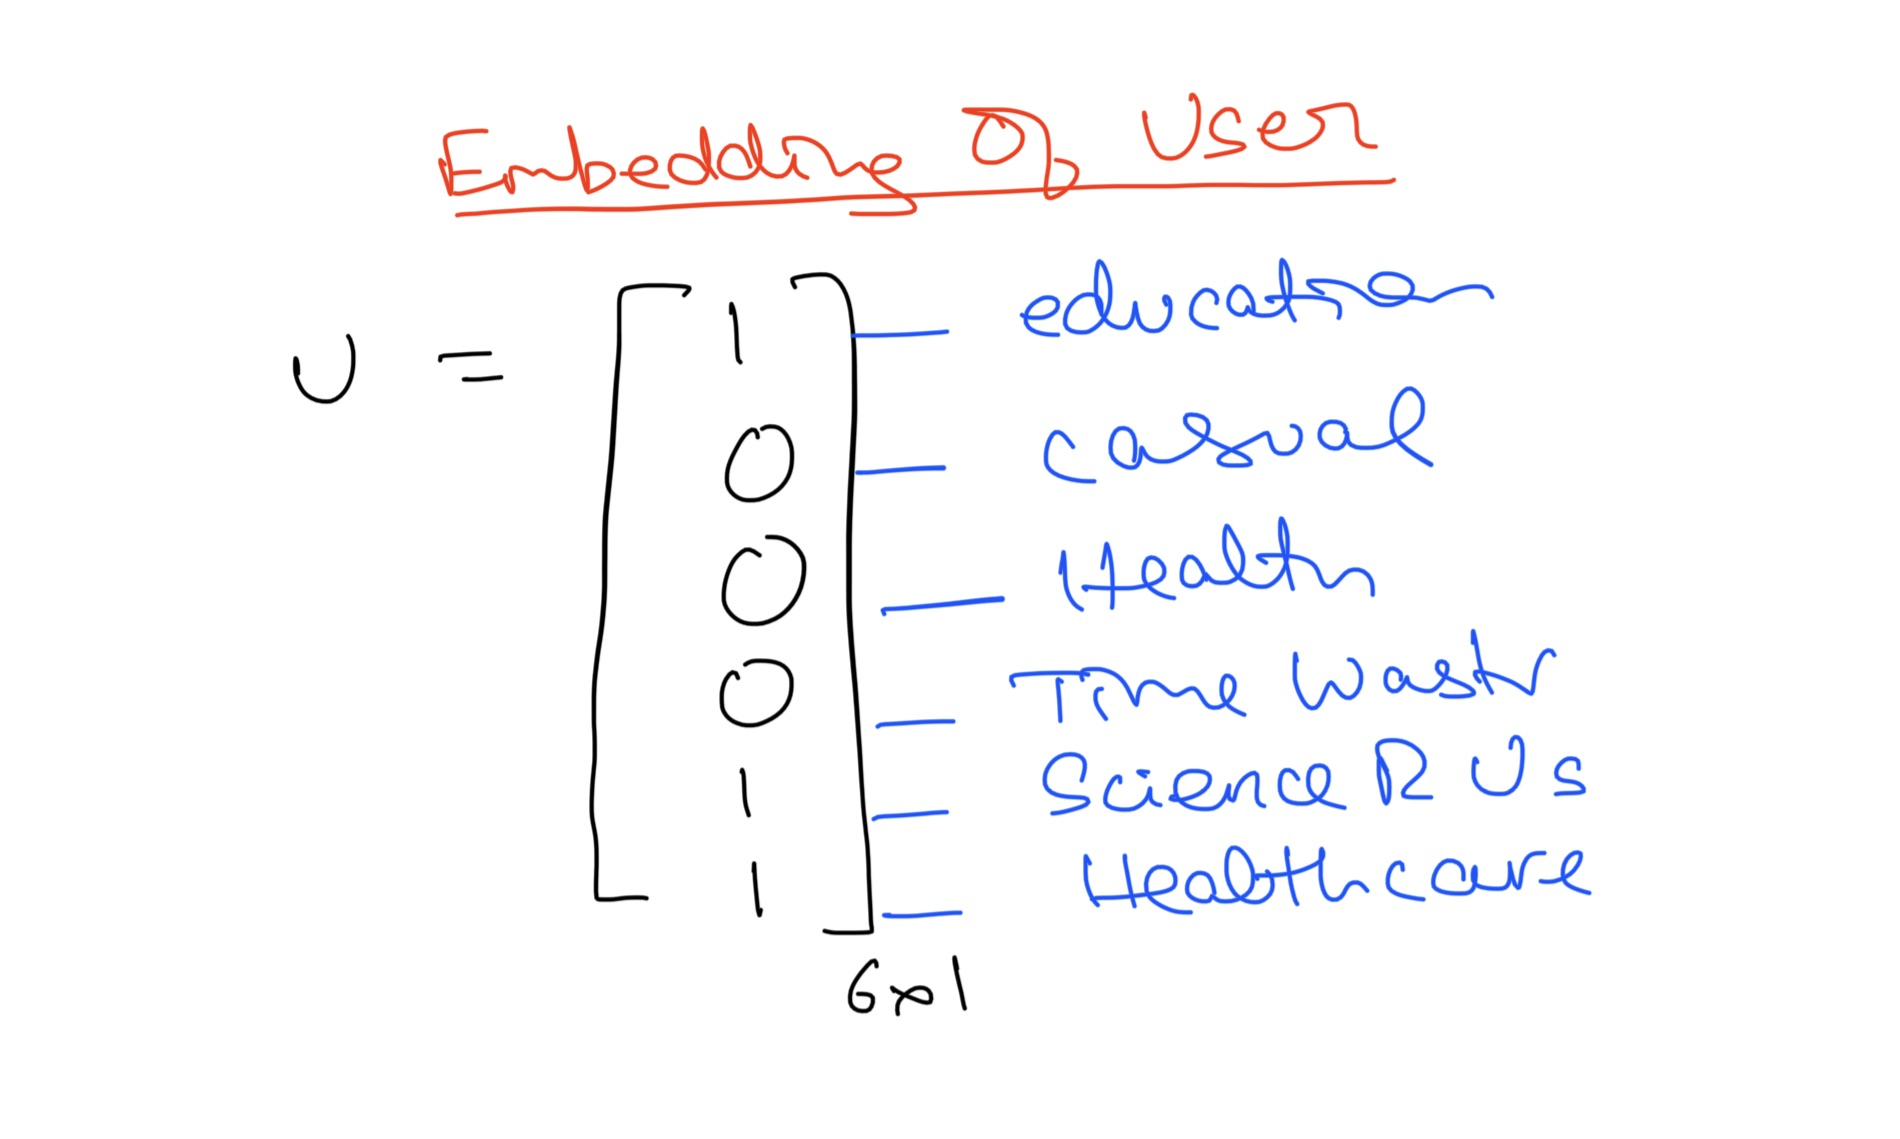

## Using Dot Product as a Similarity Measure

Consider the case where the user embedding $x$ and the app embedding $y$ are both binary vectors. In the dot product, a feature appearing in both $x$ and $y$ contributes a 1 to the sum. In other words,  is the number of features that are active in both vectors simultaneously. A high dot product then indicates more common features, thus a higher similarity.

**So, in the above example, which app should be recommended to the user?**

# Answer

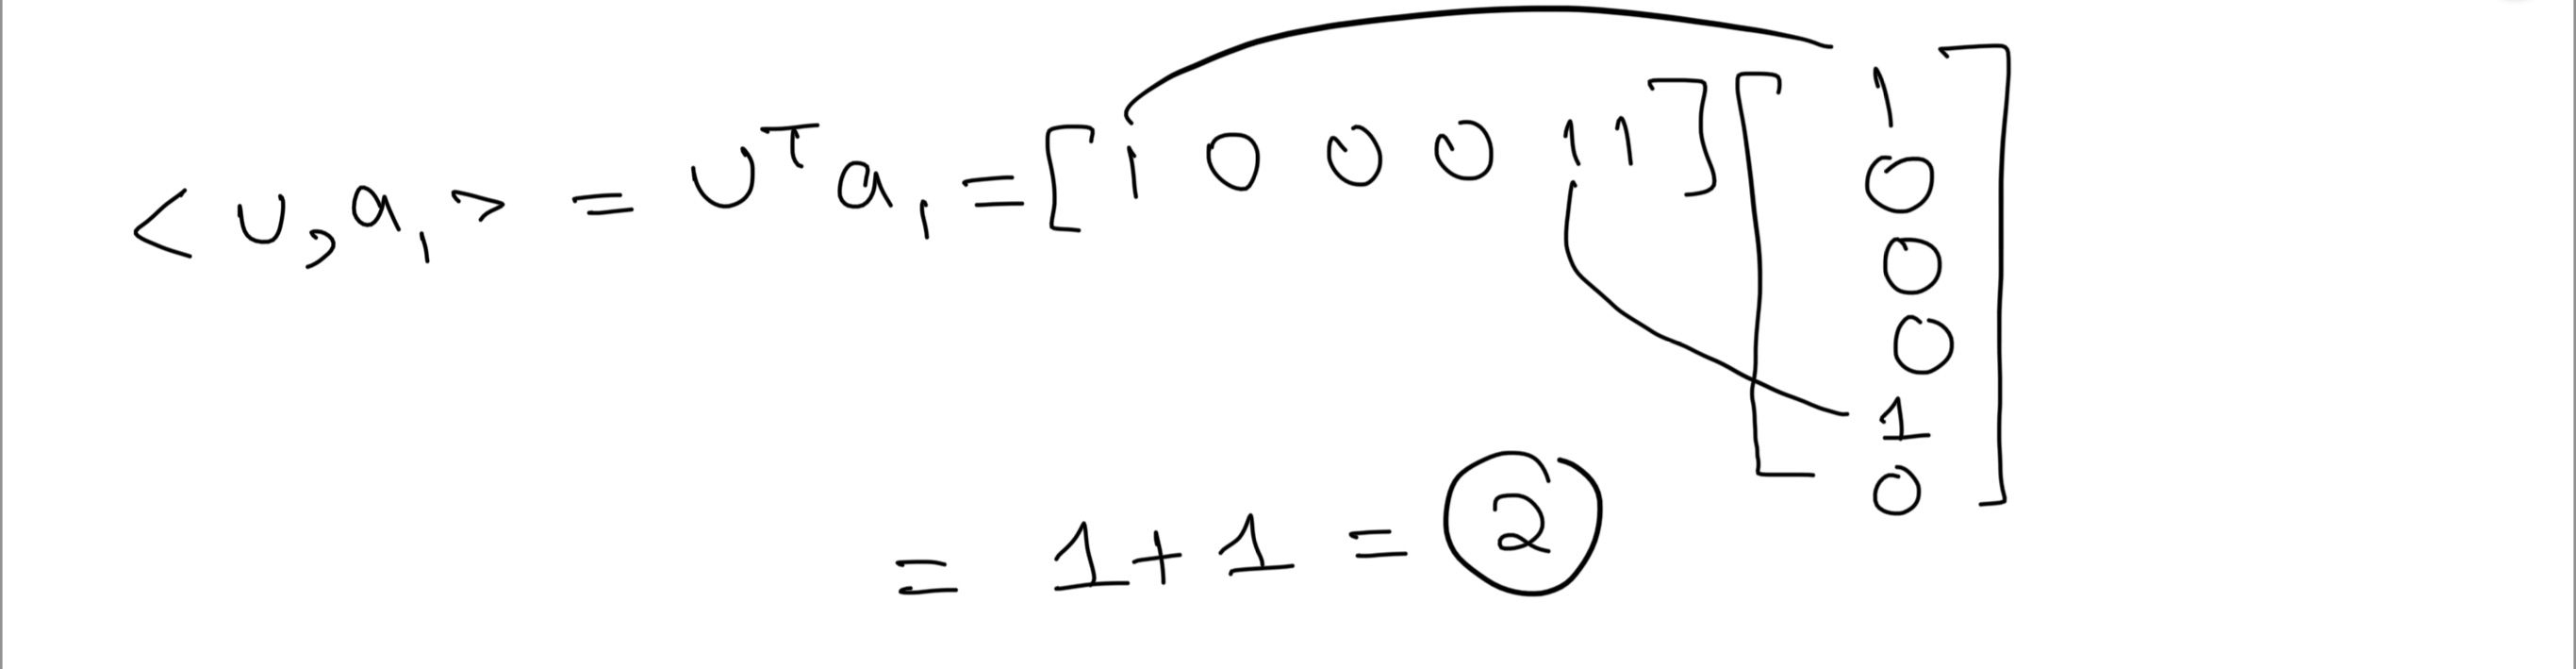

# **Advantages**


*  The model doesn't need any data about other users, since the recommendations are specific to this user. This makes it easier to scale to a large number of users.
*  The model can capture the specific interests of a user, and can recommend niche items that very few other users are interested in.



# **Disadvantages**

*  Since the **feature representation of the items are hand-engineered** to some extent, this technique requires a lot of domain knowledge (ex.types of mobile apps). Therefore, the model can only be as good as the hand-engineered features.
*  The model can only make recommendations based on existing interests of the user. In other words, the model has limited ability to expand beyond the users' existing interests.


# Collaborative Recommenders 



*   To address some of the limitations of content-based filtering, collaborative filtering uses similarities between users and items simultaneously to provide recommendations. So, collaborative filtering models can recommend an item to user A based on the interests of a similar user B. 
*   **Furthermore, the embeddings can be learned automatically, without relying on hand-engineering of features.**






Let's consider the example of a movie recommendation system in which the training data consists of a feedback matrix in which:

Each row represents a user.

Each column represents an item (a movie).

The feedback about movies falls into one of two categories:

* Explicit— users specify how much they liked a particular movie by providing a 
numerical rating.
* Implicit— if a user watches a movie, the system infers that the user is interested.

For simplicity, let's assume that the feedback matrix is binary; that is, a value of 1 indicates interest in the movie.


Let's consider a simple 2-D embedding model. (empedding space can be of higher dimension too, but we are limiting to 2d space.)

Let the features of a movie be


*   Children or Adult
*   Blockbuster (wide audience) (or) Art-house (niche audience)



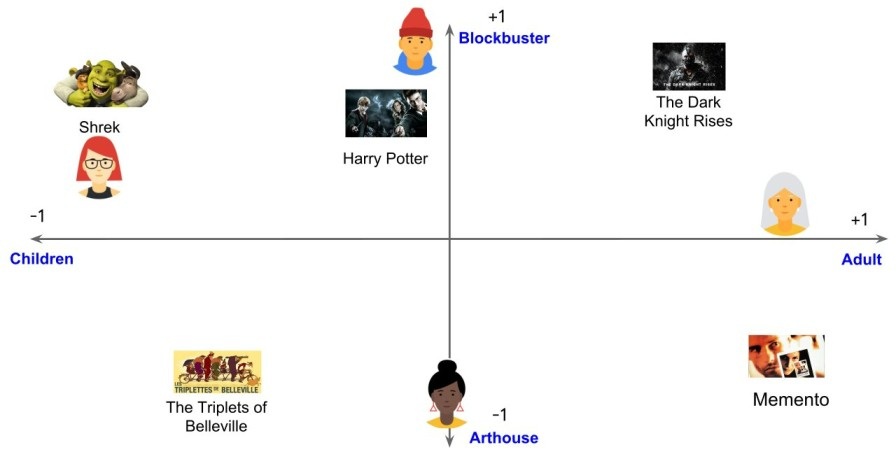

Now, we represent the users too in the same feature space based on their preferences. For the sake of simplicity, in this example, we assume the user embeddings are already available to us. 

2Dmatrix.svg

**Let's try to figure out if Shrek should be recommended to User - 4.**

Suppose a user had exactly same embedding as Shrek, it means, it should definitely be recommended as the movie perfectly matches the user's preferences. 

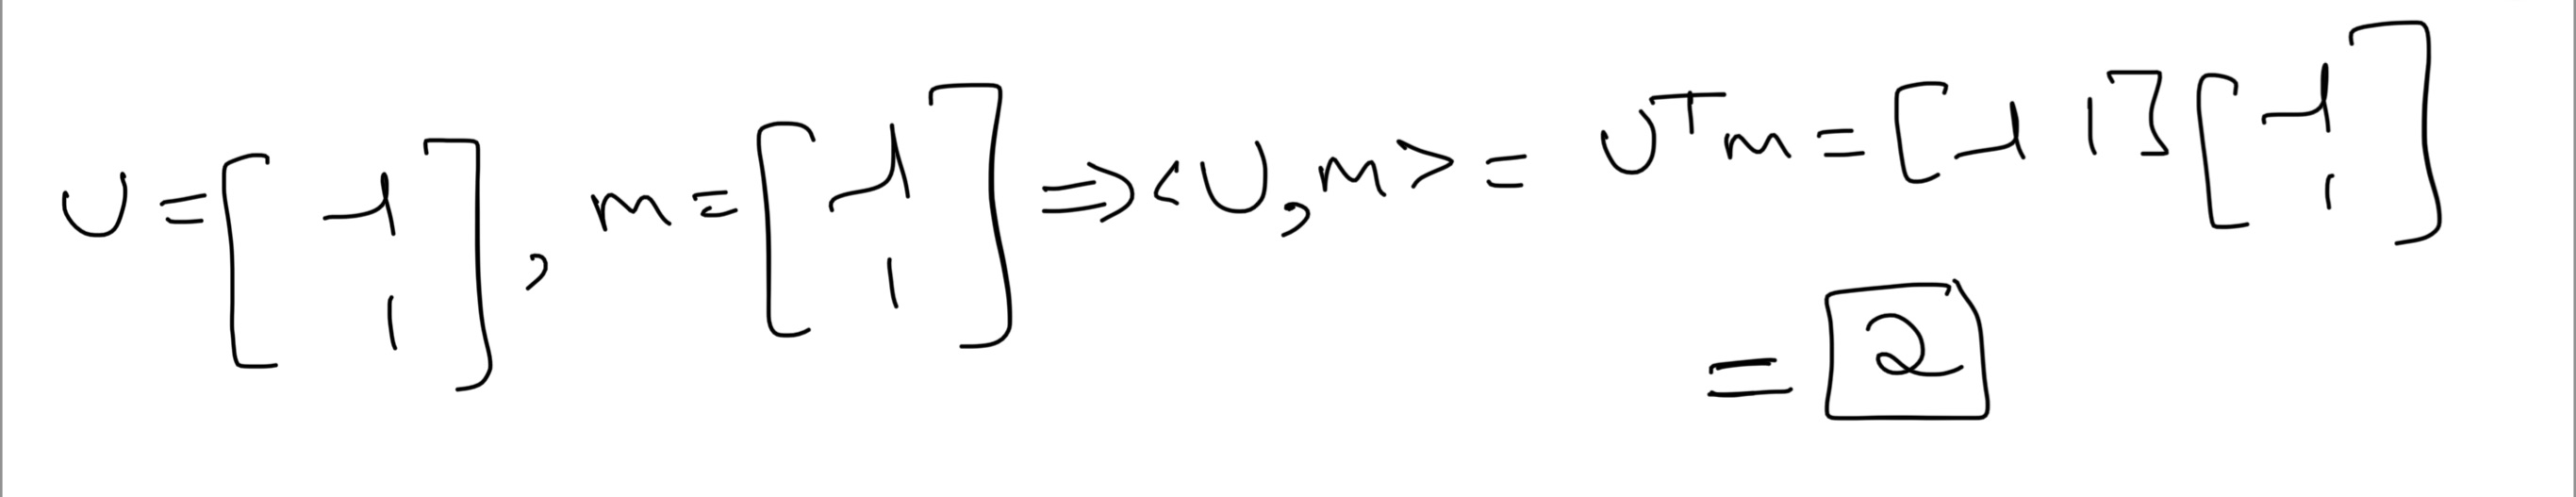

Notice, the maximum score that can be achieved is 2. Now let's consider the dot product of user 4's embedding and the movie Shrek.

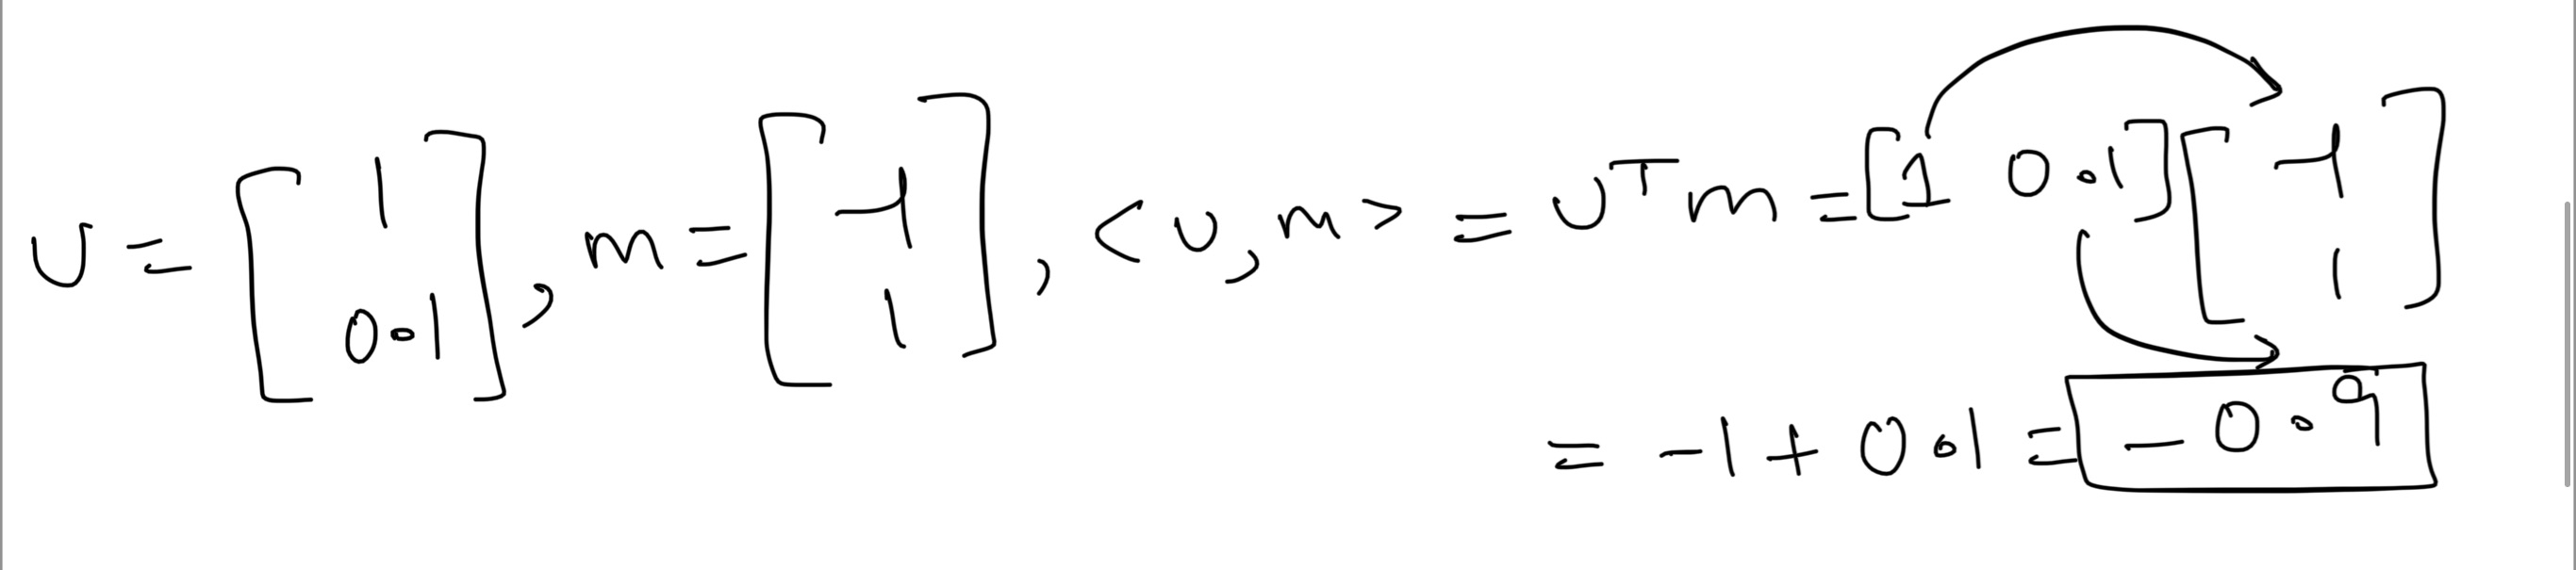

We see that the score is pretty low, so Shrek is probably not a good match for user-4. To be specific, after we set a particular cutoff score, we can decide if a movie should be recommended to a particular user or not.

In practice, the embeddings can be learned automatically, which is the power of collaborative filtering models. **(Look up**: Matrix Factorization embedding model)



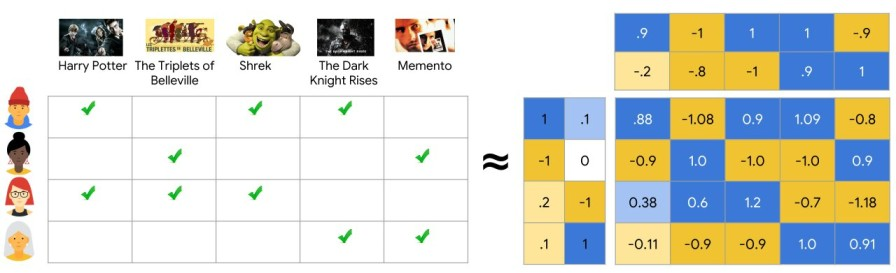

The embeddings are learned such that the product $u^Tm$ is a good approximation of the feedback matrix. If a movie has been watched by user, the corresponding dot product should be high, and if not, it should be lower.

Suppose the embedding vectors for the movies are fixed (generally, the case). Then, the model can learn an embedding vector for the users to **best explain their preferences**. Consequently, embeddings of users with similar preferences will be close together. Similarly, if the embeddings for the users are fixed, then we can learn movie embeddings to best explain the feedback matrix. As a result, embeddings of movies liked by similar users will be close in the embedding space.

This is the essence of the collaborative nature of this approach.

**Advantages**

*   We don't need domain knowledge because the embeddings are automatically learned.
*   The model can help users discover new interests. In isolation, the ML system may not know the user is interested in a given item, but the model might still recommend it because similar users are interested in that item.

**Disadvantages**


*   The prediction of the model for a given (user, item) pair is the dot product of the corresponding embeddings. So, if an item is not **seen** (no user has interacted with that item) during training, the system can't create an embedding for it and can't query the model with this item. This issue is often called the cold-start problem.

  On the other hand, content-based filtering systems are less prone to this problem as items are recommended by the features and not based on the fact if other users have used it.

# Implementation of a Recommendation System (try it)

In [ ]:
import numpy as np
import pandas as pd

df1 = pd.read_csv("rec_systems_train.csv")
df1.head()

,book_id,author_id,book_genre,reader_id,num_pages,book_rating,publisher_id,publish_year,book_price,text_lang
0,655,52,4,11482,300,4,8,2012,94,7
1,2713,90,3,6479,469,1,8,2012,33,5
2,409,17,2,25472,435,1,12,2001,196,4
3,1150,234,10,23950,529,2,23,2019,79,2
4,2424,390,5,13046,395,2,20,2010,200,4


In [ ]:
df1.columns

Index(['book_id', 'author_id', 'book_genre', 'reader_id', 'num_pages',
       'book_rating', 'publisher_id', 'publish_year', 'book_price',
       'text_lang'],
      dtype='object')

In [ ]:
# Verifying all are numbers
df1.shape

(100000, 10)

In [ ]:
# Checking for null values
df1['reader_id'].unique()

array([11482,  6479, 25472, ...,   261,  6647,  2010])

In [ ]:
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds

def normalize(pred_ratings):
    '''
    This function will normalize the input pred_ratings
    
    parameters:
        pred_ratings (List -> List) : The prediction ratings 
    '''
    return (pred_ratings - pred_ratings.min()) / (pred_ratings.max() - pred_ratings.min())
  
def generate_prediction_df(mat, pt_df, n_factors):
    '''
    This function will calculate the single value decomposition of the input matrix
    given n_factors. It will then generate and normalize the user rating predictions.
    
    parameters:
        mat (CSR Matrix) : scipy csr matrix corresponding to the pivot table (pt_df)
        pt_df (DataFrame) : pandas dataframe which is a pivot table
        n_factors (Integer) : Number of singular values and vectors to compute. 
                              Must be 1 <= n_factors < min(mat.shape). 
    '''
        
    # matrix factorization
    u, s, v = svds(mat, k = n_factors)
    s = np.diag(s)

    # calculate pred ratings
    pred_ratings = np.dot(np.dot(u, s), v) 
    pred_ratings = normalize(pred_ratings)
    
    # convert to df
    pred_df = pd.DataFrame(
        pred_ratings,
        columns = pt_df.columns,
        index = list(pt_df.index)
    ).transpose()
    return pred_df

def recommend_items(pred_df, usr_id, n_recs):
    '''
    Given a usr_id and pred_df this function will recommend
    items to the user.
    
    parameters:
        pred_df (DataFrame) : generated from the 'generate_prediction_df' function
        usr_id (Integer) : The user you wish to get item recommendations for
        n_recs (Integer) : The number of recommendations you want for this user
    '''
    
    usr_pred = pred_df[usr_id].sort_values(ascending = False).reset_index().rename(columns = {usr_id : 'sim'})
    # Sorting by similarity score in descending order and returning first 'n_rec' records.
    rec_df = usr_pred.sort_values(by = 'sim', ascending = False).head(n_recs)
    return rec_df

# generate a pivot table with readers on the index and books on the column and values being the ratings
pt_df = df1.pivot_table(
    columns = 'book_id',
    index = 'reader_id',
    values = 'book_rating'
).fillna(0)

# convert to a csr matrix
mat = pt_df.values
mat = csr_matrix(mat)

pred_df = generate_prediction_df(mat, pt_df, 10)

# generate recommendations
print(recommend_items(pred_df, 261, 5))

   book_id       sim
0     1341  0.141027
1     1839  0.140020
2     1208  0.139862
3     1897  0.139720
4     2138  0.139664
